In [6]:
%load_ext autoreload
%autoreload 2

import sys
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import rasterio

sys.path.append('..')
import pymoon
from pymoon.config import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
dem_arr = rasterio.open(PATH_LDEM_4).read(1).astype(float)
tex_arr = rasterio.open(PATH_LROC_COLOR_2K).read([1, 2, 3]).astype(int)
tex_arr = np.moveaxis(tex_arr, 0, -1)  # Normalize to [0, 1]

print("DEM Array Shape:", dem_arr.shape)
print("Texture Array Shape:", tex_arr.shape)

print(
    f"DEM Array Stats: min: {np.min(dem_arr):0.02f}, max: {np.max(dem_arr):0.02f}"
)
print(
    f"Texture Array Stats: min: {np.min(tex_arr):0.02f}, max: {np.max(tex_arr):0.02f}"
)



DEM Array Shape: (720, 1440)
Texture Array Shape: (1024, 2048, 3)
DEM Array Stats: min: -8.88, max: 10.50
Texture Array Stats: min: 41.00, max: 255.00


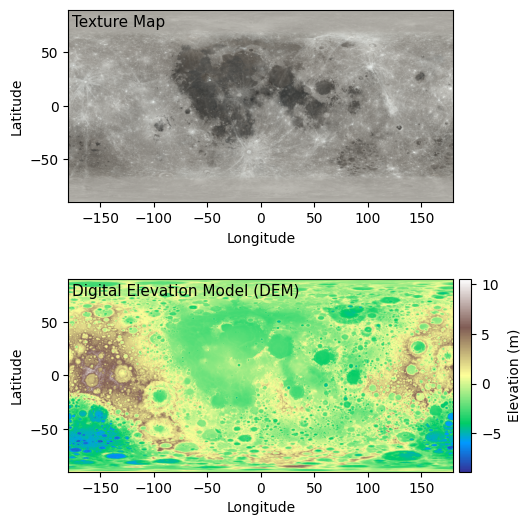

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fs, r = 6, 1
fig, axs = plt.subplots(2, 1, figsize=(fs * r, fs))
plt.subplots_adjust(hspace=0.4)

extent = [-180, 180, -90, 90]

im0 = axs[0].imshow(tex_arr.astype(np.uint8), extent=extent)
im1 = axs[1].imshow(dem_arr, cmap="terrain", extent=extent)


box = axs[1].get_position()
cax = fig.add_axes([box.x1 + 0.01, box.y0, 0.02, box.height])
fig.colorbar(im1, cax=cax, orientation="vertical")
cax.set_ylabel("Elevation (m)")

for ax in axs:
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")


titles = ["Texture Map", "Digital Elevation Model (DEM)"]

for i, title in enumerate(titles):
    axs[i].text(
        0.01, 0.975,
        title,
        fontsize=11,
        color="k",
        ha="left",
        va="top",
        transform=axs[i].transAxes,
    )

save_filename = "lunar_maps_texture_dem.png"
save_folder = "plots_for_doc"  # Update this to your desired save path
plt.savefig(f"{save_folder}/{save_filename}", bbox_inches="tight", dpi=300)
plt.show()